<h1>DIABETES DATA ANALYSIS AND PREDICTING</h1>

# Data Collection

In [1]:
# importing required packages
import pandas as pd
import numpy as np

df_1 = pd.read_csv('diabetes.csv')  # importing file

In [2]:
from ucimlrepo import fetch_ucirepo # importing dataset
  
# fetching dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# seperating features and target and storing them 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

# creating dataframe
features_df = pd.DataFrame(X)
target_df = pd.DataFrame(y)
df_2 = pd.concat([features_df, target_df], axis=1)

In [3]:
# printing description of the dataframe
for i,j in zip(features_df.columns, cdc_diabetes_health_indicators.variables['description']):
    print(f'{i:30} - {j}')
    print()

HighBP                         - Patient ID

HighChol                       - 0 = no diabetes 1 = prediabetes or diabetes

CholCheck                      - 0 = no high BP 1 = high BP

BMI                            - 0 = no high cholesterol 1 = high cholesterol

Smoker                         - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

Stroke                         - Body Mass Index

HeartDiseaseorAttack           - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

PhysActivity                   - (Ever told) you had a stroke. 0 = no 1 = yes

Fruits                         - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

Veggies                        - physical activity in past 30 days - not including job 0 = no 1 = yes

HvyAlcoholConsump              - Consume Fruit 1 or more times per day 0 = no 1 = yes

AnyHealthcare                  - Consume Vegetables 1 or mor

In [4]:
df_3 = pd.read_csv('diabetes_3.csv')

In [5]:
display(df_1.head())  # displaying head of the dataframe
display(df_2.head())
display(df_3.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# Data Cleaning

In [6]:
# priting shape of the dataframes
print('shape of dataframes 1', df_1.shape)
print('shape of dataframes 2', df_2.shape)
print('shape of dataframes 3', df_3.shape)

shape of dataframes 1 (768, 9)
shape of dataframes 2 (253680, 22)
shape of dataframes 3 (70692, 22)


In [7]:
# removing unnecesary columns
df_2 = df_2.drop(columns=['NoDocbcCost'])
df_3 = df_3.drop(columns=['NoDocbcCost'])

In [8]:
# renaming columns as per our need

df_1.rename(columns={'Outcome': 'diabetes_target'}, inplace=True)

new_names = {
    'HighChol' : 'high_cholesterol',
    'CholCheck' : 'cholesterol_check',
    'Smoker' : 'is_smoker',
    'Stroke' : 'had_heart_stroke',
    'DiffWalk' : 'walking_difficulty',
    'HeartDiseaseorAttack' : 'have_heart_disease',
    'PhysActivity' : 'physical_activity',
    'Fruits' : 'eats_fruits',
    'Veggies' : 'eats_veggies',
    'HvyAlcoholConsump' : 'heavy_alcohol_consumption',
    'AnyHealthcare' : 'under_medication',
    'Diabetes_binary': 'diabetes_target'
}
df_2.rename(columns=new_names, inplace=True)
df_3.rename(columns=new_names, inplace=True)

In [9]:
# moving target to end of dataframe
columns = list(df_2.columns)
columns.append(columns.pop(columns.index('diabetes_target')))
df_2 = df_2[columns]

columns = list(df_3.columns)
columns.append(columns.pop(columns.index('diabetes_target')))
df_3 = df_3[columns]

In [10]:
# removing outliers using BMI column
df_2 = df_2[df_2['BMI'] <= 65]
df_3 = df_3[df_3['BMI'] <= 65]

df_2 = df_2[df_2['BMI'] >= 10]
df_3 = df_3[df_3['BMI'] >= 10]

In [11]:
dataframes = [df_1, df_2, df_3]

In [12]:
# Checking for Missing Values
for df in dataframes:
    print(df.isnull().sum())
    print('-'*40)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
diabetes_target             0
dtype: int64
----------------------------------------
HighBP                       0
high_cholesterol             0
cholesterol_check            0
BMI                          0
is_smoker                    0
had_heart_stroke             0
have_heart_disease           0
physical_activity            0
eats_fruits                  0
eats_veggies                 0
heavy_alcohol_consumption    0
under_medication             0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
walking_difficulty           0
Sex                          0
Age                          0
Education                    0
Income                       0
diabetes_target              0
dtype: int64
------------

In [13]:
# shape before removing duplicates
print('shape of the dataframes before removing duplicates')
for df in dataframes:
    print(df.shape)

shape of the dataframes before removing duplicates
(768, 9)
(253030, 21)
(70510, 21)


In [14]:
# checking and removing duplicate rows
for df in dataframes:
    num_duplicate_rows = df.duplicated().sum()
    print("Number of duplicate rows before:", num_duplicate_rows)

    df.drop_duplicates(inplace=True)

    num_duplicate_rows = df.duplicated().sum()
    print("Number of duplicate rows after:", num_duplicate_rows)
    print()

Number of duplicate rows before: 0
Number of duplicate rows after: 0

Number of duplicate rows before: 24888
Number of duplicate rows after: 0

Number of duplicate rows before: 1681
Number of duplicate rows after: 0



In [15]:
# shape before removing duplicates
print('shape of the dataframes after removing duplicates')
for df in dataframes:
    print(df.shape)

shape of the dataframes after removing duplicates
(768, 9)
(228142, 21)
(68829, 21)


In [16]:
# seeing the datatypes for the dataframes
print('datatypes of the individual dataframes')
for df in dataframes:
    print(df.dtypes)
    print('-'*40)

datatypes of the individual dataframes
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
diabetes_target               int64
dtype: object
----------------------------------------
HighBP                       int64
high_cholesterol             int64
cholesterol_check            int64
BMI                          int64
is_smoker                    int64
had_heart_stroke             int64
have_heart_disease           int64
physical_activity            int64
eats_fruits                  int64
eats_veggies                 int64
heavy_alcohol_consumption    int64
under_medication             int64
GenHlth                      int64
MentHlth                     int64
PhysHlth                     int64
walking_difficulty           int64
Sex                   

In [17]:
# printing columns for individual dataframes
print('columns of the dataframes')
for df in dataframes:
    print(df.columns)
    print('-'*40)

columns of the dataframes
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'diabetes_target'],
      dtype='object')
----------------------------------------
Index(['HighBP', 'high_cholesterol', 'cholesterol_check', 'BMI', 'is_smoker',
       'had_heart_stroke', 'have_heart_disease', 'physical_activity',
       'eats_fruits', 'eats_veggies', 'heavy_alcohol_consumption',
       'under_medication', 'GenHlth', 'MentHlth', 'PhysHlth',
       'walking_difficulty', 'Sex', 'Age', 'Education', 'Income',
       'diabetes_target'],
      dtype='object')
----------------------------------------
Index(['HighBP', 'high_cholesterol', 'cholesterol_check', 'BMI', 'is_smoker',
       'had_heart_stroke', 'have_heart_disease', 'physical_activity',
       'eats_fruits', 'eats_veggies', 'heavy_alcohol_consumption',
       'under_medication', 'GenHlth', 'MentHlth', 'PhysHlth',
       'walking_difficulty', 'Sex', 'Age', 'Education'

In [18]:
# printing number of unique values in each column in all dataframes
for df in dataframes:
    print("Number of unique values in each column:\n", df.nunique())
    print('-' * 50)

Number of unique values in each column:
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
diabetes_target               2
dtype: int64
--------------------------------------------------
Number of unique values in each column:
 HighBP                        2
high_cholesterol              2
cholesterol_check             2
BMI                          54
is_smoker                     2
had_heart_stroke              2
have_heart_disease            2
physical_activity             2
eats_fruits                   2
eats_veggies                  2
heavy_alcohol_consumption     2
under_medication              2
GenHlth                       5
MentHlth                     31
PhysHlth                     31
walking_difficulty            2
Sex                           2
Age                   

In [19]:
# priting shape of the dataframes
print('shape of dataframes 1', df_1.shape)
print('shape of dataframes 2', df_2.shape)
print('shape of dataframes 3', df_3.shape)

shape of dataframes 1 (768, 9)
shape of dataframes 2 (228142, 21)
shape of dataframes 3 (68829, 21)


<h2>Data Transformation</h2>

Feature Engineering

In [20]:
df_1['BMI_Glucose'] = df_1['BMI'] + df_1['Glucose']

df_2['HighBP_GenHlth'] = df_2['HighBP'] + df_2['GenHlth']
df_2['cholesterol_walkdiff'] = df_2['high_cholesterol'] + df_2['walking_difficulty']
df_3['HighBP_GenHlth'] = df_3['HighBP'] + df_3['GenHlth']
df_3['cholesterol_walkdiff'] = df_3['high_cholesterol'] + df_3['walking_difficulty']

Feature Interaction

In [21]:
df_2['GenHlth-HighBP'] = df_2['GenHlth'] * df_2['HighBP']
df_2['BMI-Age'] = df_2['BMI'] * df_2['Age']

df_3['GenHlth-HighBP'] = df_3['GenHlth'] * df_3['HighBP']
df_3['BMI-Age'] = df_3['BMI'] * df_3['Age']

In [22]:
# moving target to end of dataframe after feature engineering
columns = list(df_1.columns)
columns.append(columns.pop(columns.index('diabetes_target')))
df_1 = df_1[columns]

columns = list(df_2.columns)
columns.append(columns.pop(columns.index('diabetes_target')))
df_2 = df_2[columns]

columns = list(df_3.columns)
columns.append(columns.pop(columns.index('diabetes_target')))
df_3 = df_3[columns]

In [23]:
# priting shape of the dataframes
print('shape of dataframes 1', df_1.shape)
print('shape of dataframes 2', df_2.shape)
print('shape of dataframes 3', df_3.shape)

shape of dataframes 1 (768, 10)
shape of dataframes 2 (228142, 25)
shape of dataframes 3 (68829, 25)


In [24]:
dataframes = [df_1, df_2, df_3]

# EDA

In [25]:
# Priting correlation of all columns with target
for df in dataframes: 
    correlation_matrix = df.corr()  # finding correaltion values
    correlation_with_target = correlation_matrix['diabetes_target']
    print("Correlation of target with other columns:")
    print(correlation_with_target)
    print('-'*50)

Correlation of target with other columns:
Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
BMI_Glucose                 0.498116
diabetes_target             1.000000
Name: diabetes_target, dtype: float64
--------------------------------------------------
Correlation of target with other columns:
HighBP                       0.253731
high_cholesterol             0.194824
cholesterol_check            0.072802
BMI                          0.223655
is_smoker                    0.045325
had_heart_stroke             0.098863
have_heart_disease           0.167695
physical_activity           -0.099438
eats_fruits                 -0.024209
eats_veggies                -0.041076
heavy_alcohol_consumption   -0.066171
under_medication             0.025709
G

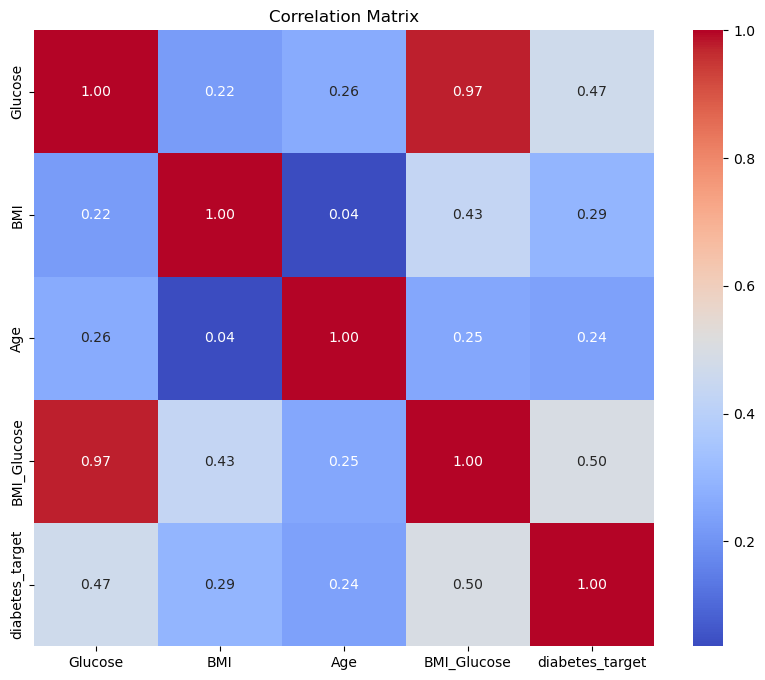

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Glucose', 'BMI', 'Age', 'BMI_Glucose', 'diabetes_target']

# Computing correlation matrix for selected columns
correlation_matrix = df_1[selected_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

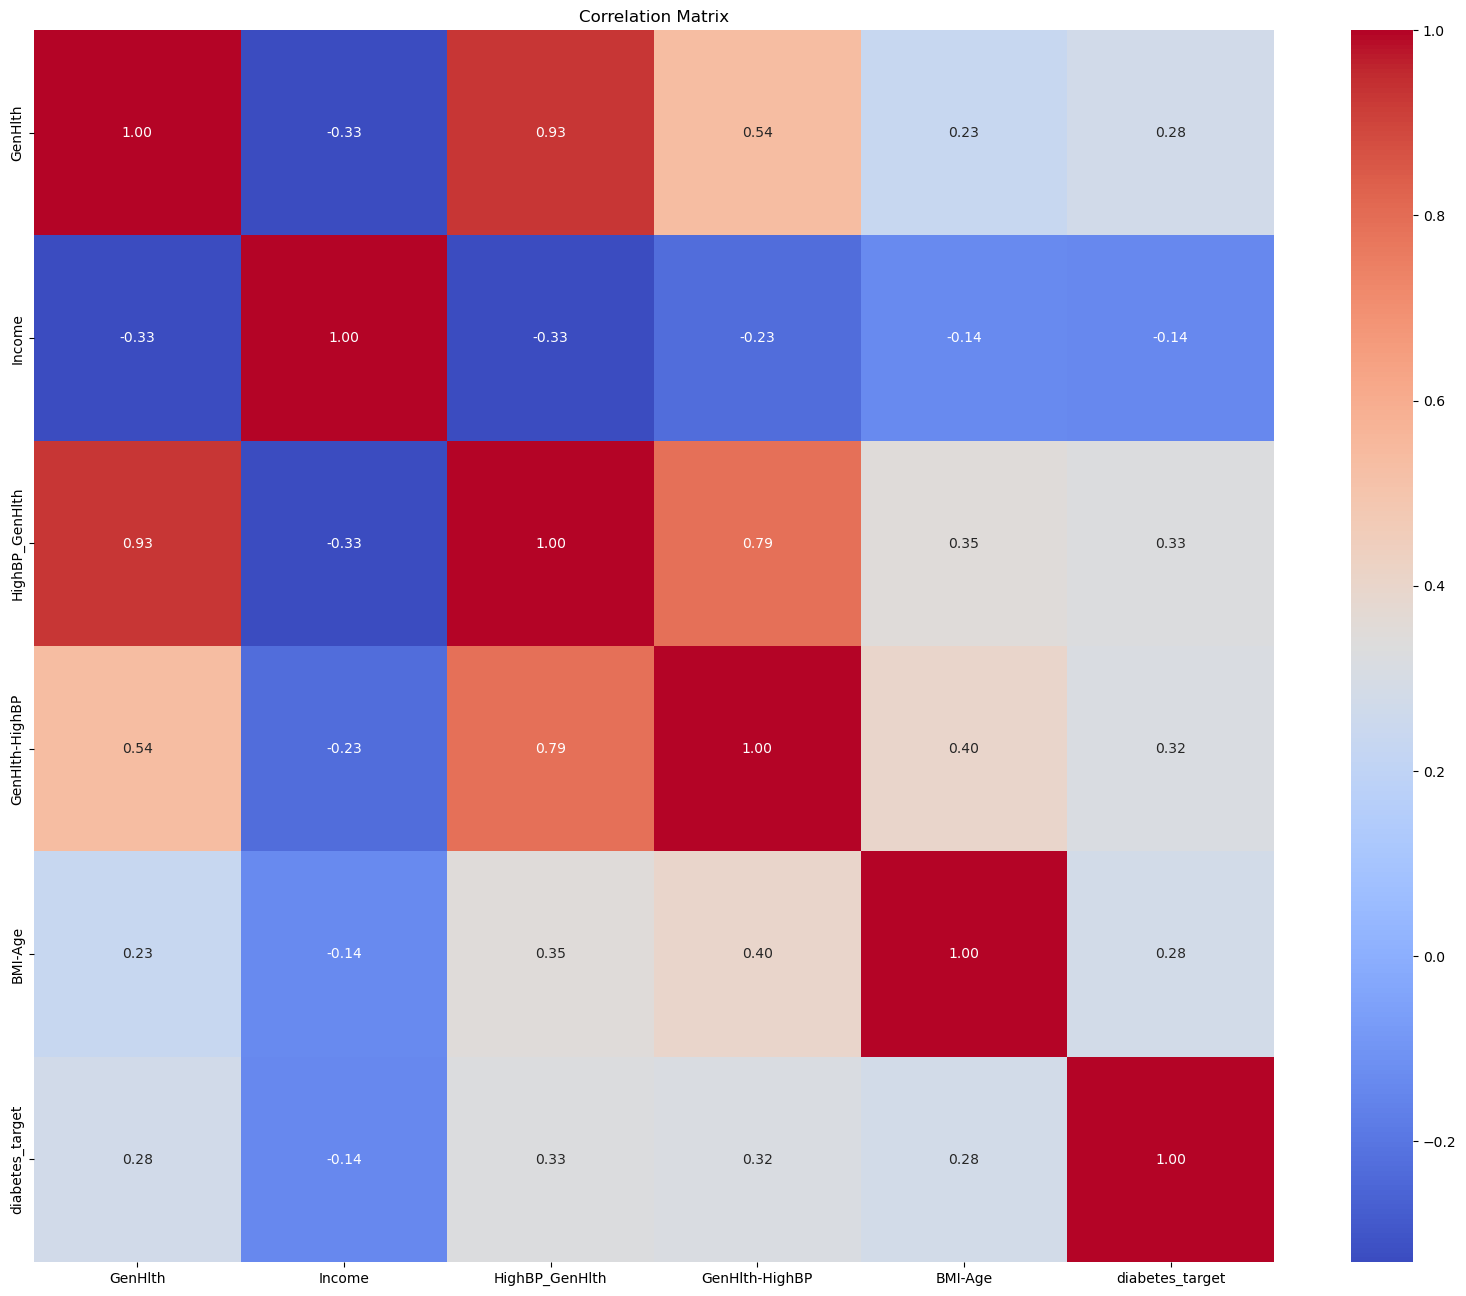

In [27]:
selected_columns = ['GenHlth', 'Income', 'HighBP_GenHlth',
                    'GenHlth-HighBP', 'BMI-Age', 'diabetes_target']

# Computing correlation matrix for selected columns
correlation_matrix = df_2[selected_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

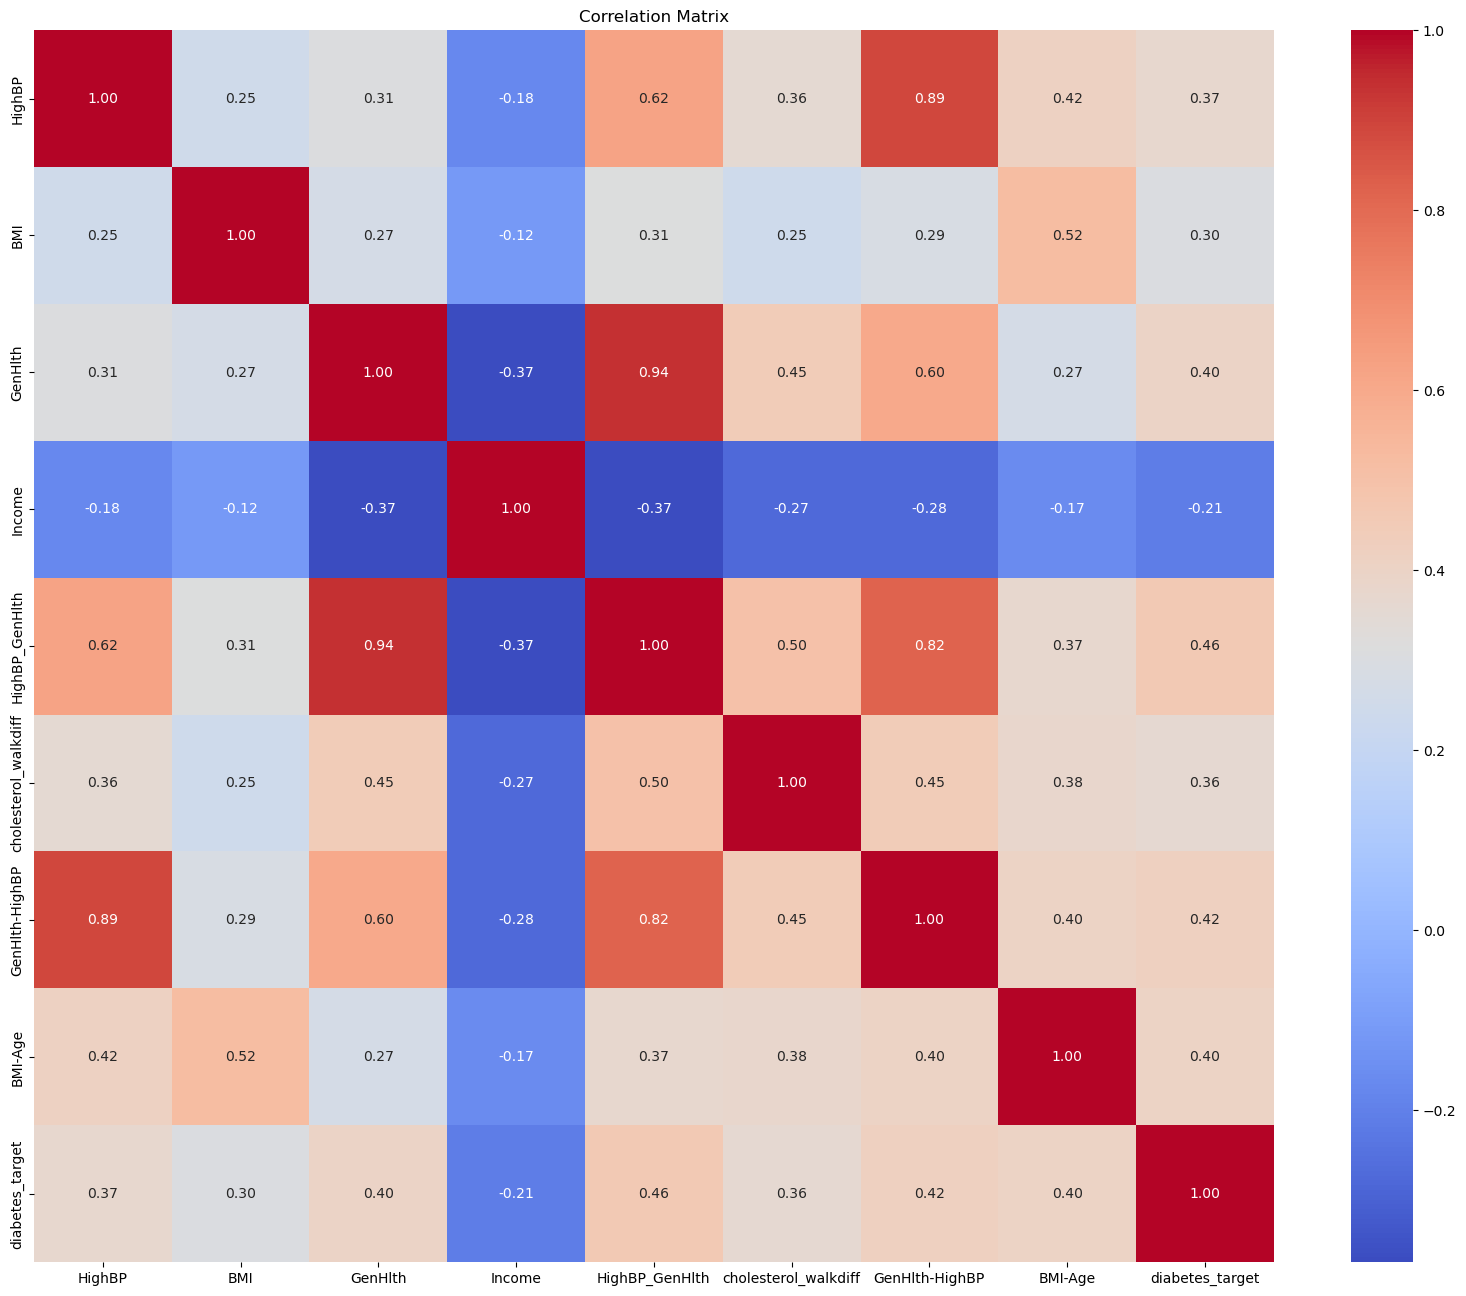

In [28]:
selected_columns = ['HighBP', 'BMI', 'GenHlth', 'Income', 'HighBP_GenHlth',
                    'cholesterol_walkdiff','GenHlth-HighBP', 'BMI-Age', 'diabetes_target']


# Computing correlation matrix for selected columns
correlation_matrix = df_3[selected_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

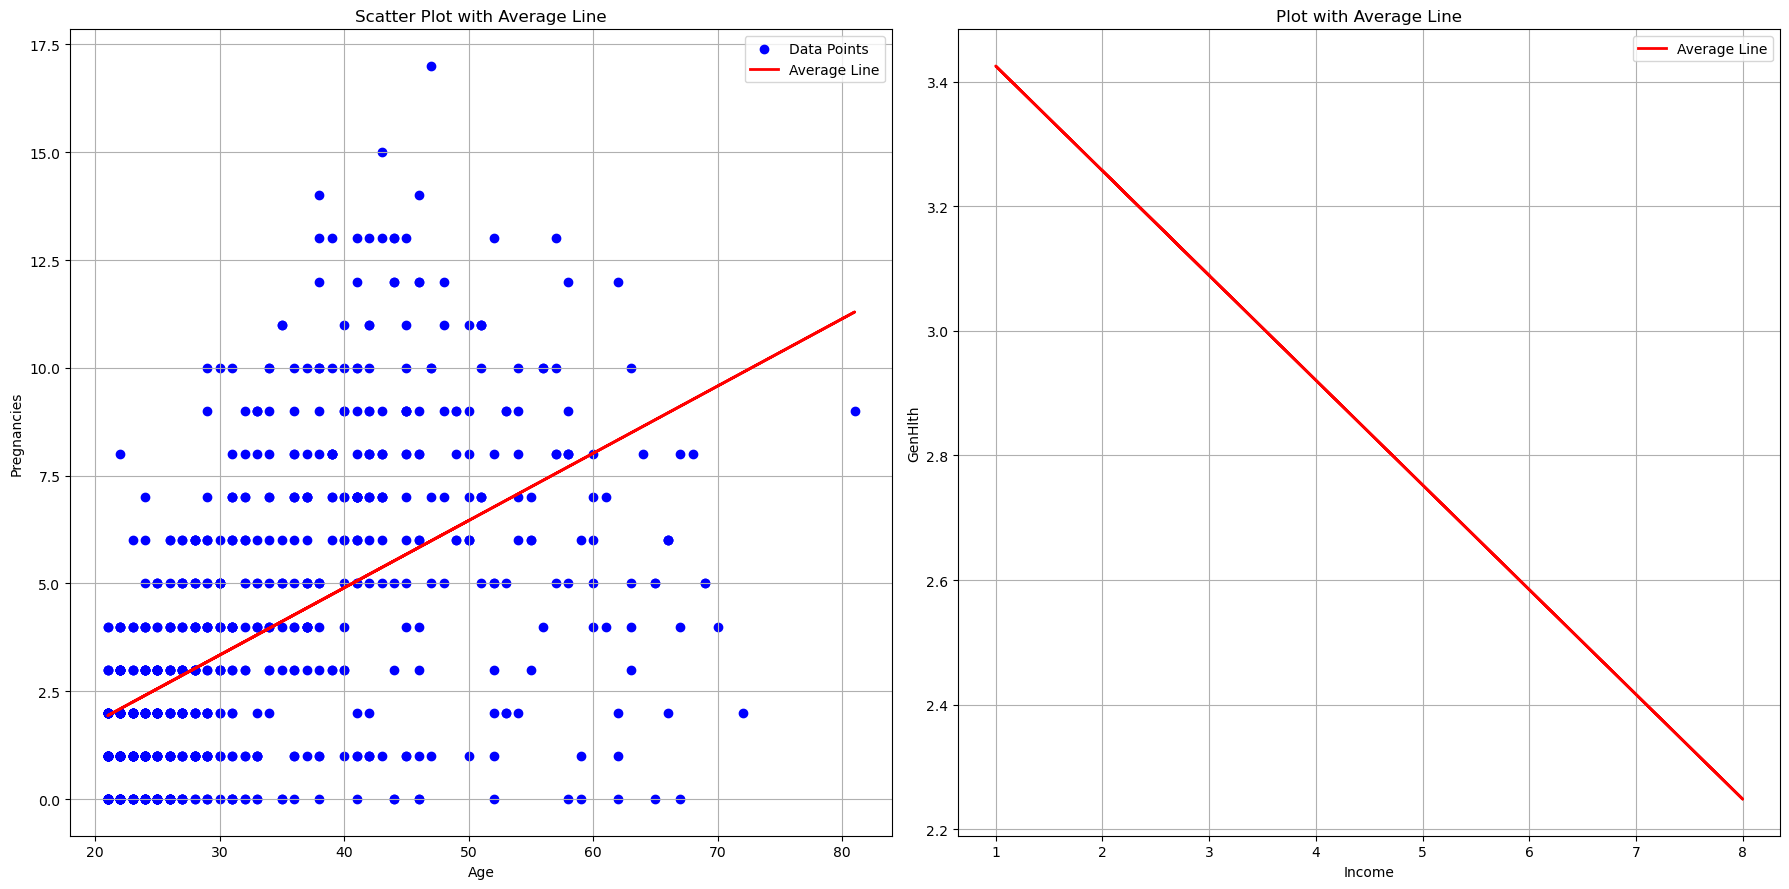

In [29]:
# making 1x2 subplot 
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].scatter(df_1['Age'], df_1['Pregnancies'], color='blue', label='Data Points')

# Calculating slope and intercept
slope, intercept = np.polyfit(df_1['Age'], df_1['Pregnancies'], 1)
# Generating the line equation
average_line = slope * df_1['Age'] + intercept

# Plotting the average line
axs[0].plot(df_1['Age'], average_line, color='red', linestyle='-', linewidth=2, label='Average Line')

# adding labels and title
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Pregnancies')
axs[0].set_title('Scatter Plot with Average Line')
axs[0].legend()
axs[0].grid(True)



# Calculating slope and intercept
slope, intercept = np.polyfit(df_2['Income'], df_2['GenHlth'], 1)
# Generating the line equation
average_line = slope * df_2['Income'] + intercept

# Plotting the average line
axs[1].plot(df_2['Income'], average_line, color='red', linestyle='-', linewidth=2, label='Average Line')

# adding labels and title to the plot
axs[1].set_xlabel('Income')
axs[1].set_ylabel('GenHlth')
axs[1].set_title('Plot with Average Line')
axs[1].legend()
axs[1].grid(True)

# preventing overlapping
plt.tight_layout()

plt.show()

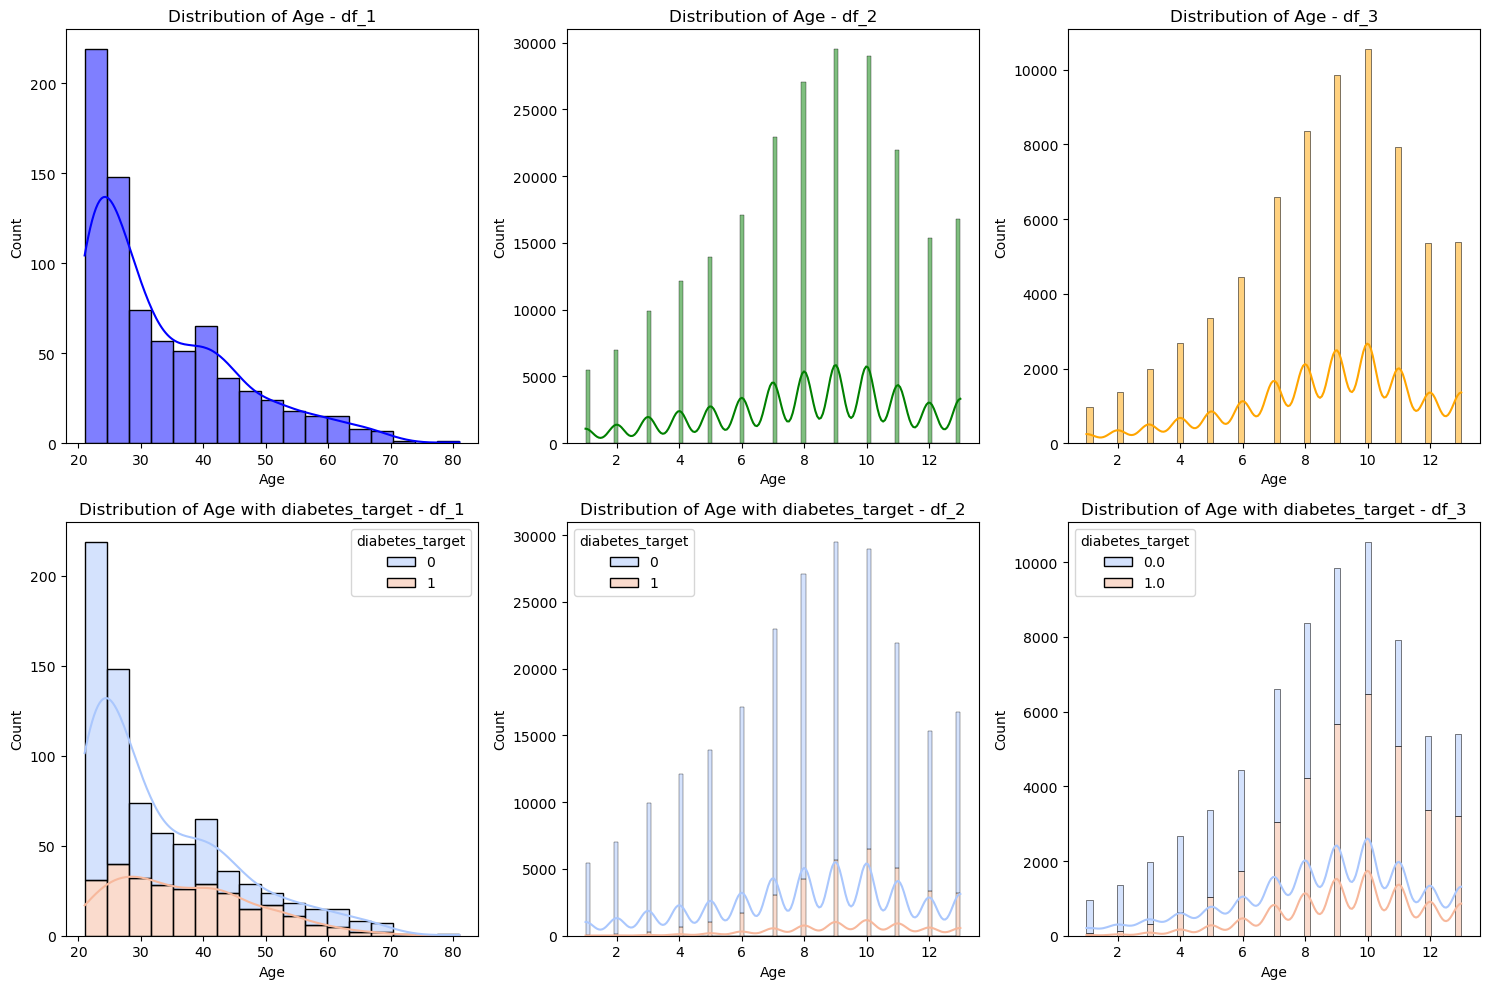

In [30]:
# making subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# ploting distribution of Age and also w.r.t. target
sns.histplot(df_1['Age'], kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age - df_1')

sns.histplot(df_2['Age'], kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age - df_2')

sns.histplot(df_3['Age'], kde=True, color='orange', ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Age - df_3')

sns.histplot(data=df_1, x='Age', hue='diabetes_target', multiple='stack', kde=True, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Age with diabetes_target - df_1')

sns.histplot(data=df_2, x='Age', hue='diabetes_target', multiple='stack', kde=True, palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Age with diabetes_target - df_2')

sns.histplot(data=df_3, x='Age', hue='diabetes_target', multiple='stack', kde=True, palette='coolwarm', ax=axs[1, 2])
axs[1, 2].set_title('Distribution of Age with diabetes_target - df_3')


plt.tight_layout()
plt.show()

From the above plot we can see that in second column the number of 0's and 1's are having high difference. Number of ones is very less than number of 0's. This is the reason we considered third dataset where output column has nearly equal number of 0's and 1's.

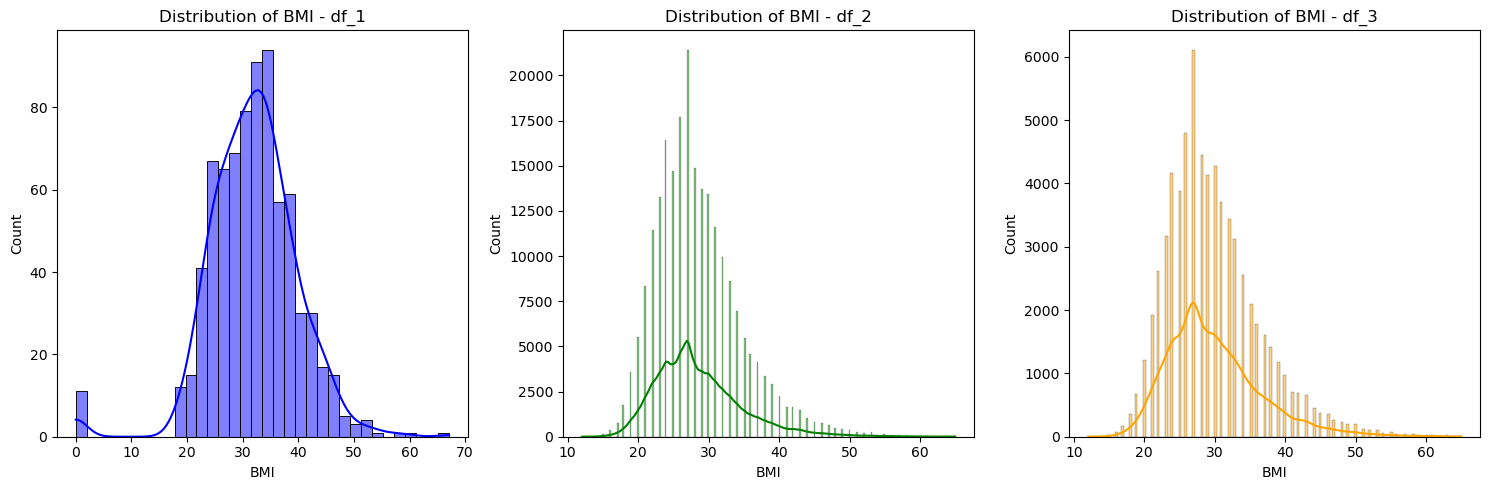

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Diatribution of BMI for dataframes
sns.histplot(df_1['BMI'], kde=True, color='blue', ax=axs[0])
axs[0].set_title('Distribution of BMI - df_1')

sns.histplot(df_2['BMI'], kde=True, color='green', ax=axs[1])
axs[1].set_title('Distribution of BMI - df_2')

sns.histplot(df_3['BMI'], kde=True, color='orange', ax=axs[2])
axs[2].set_title('Distribution of BMI - df_3')

plt.tight_layout()
plt.show()

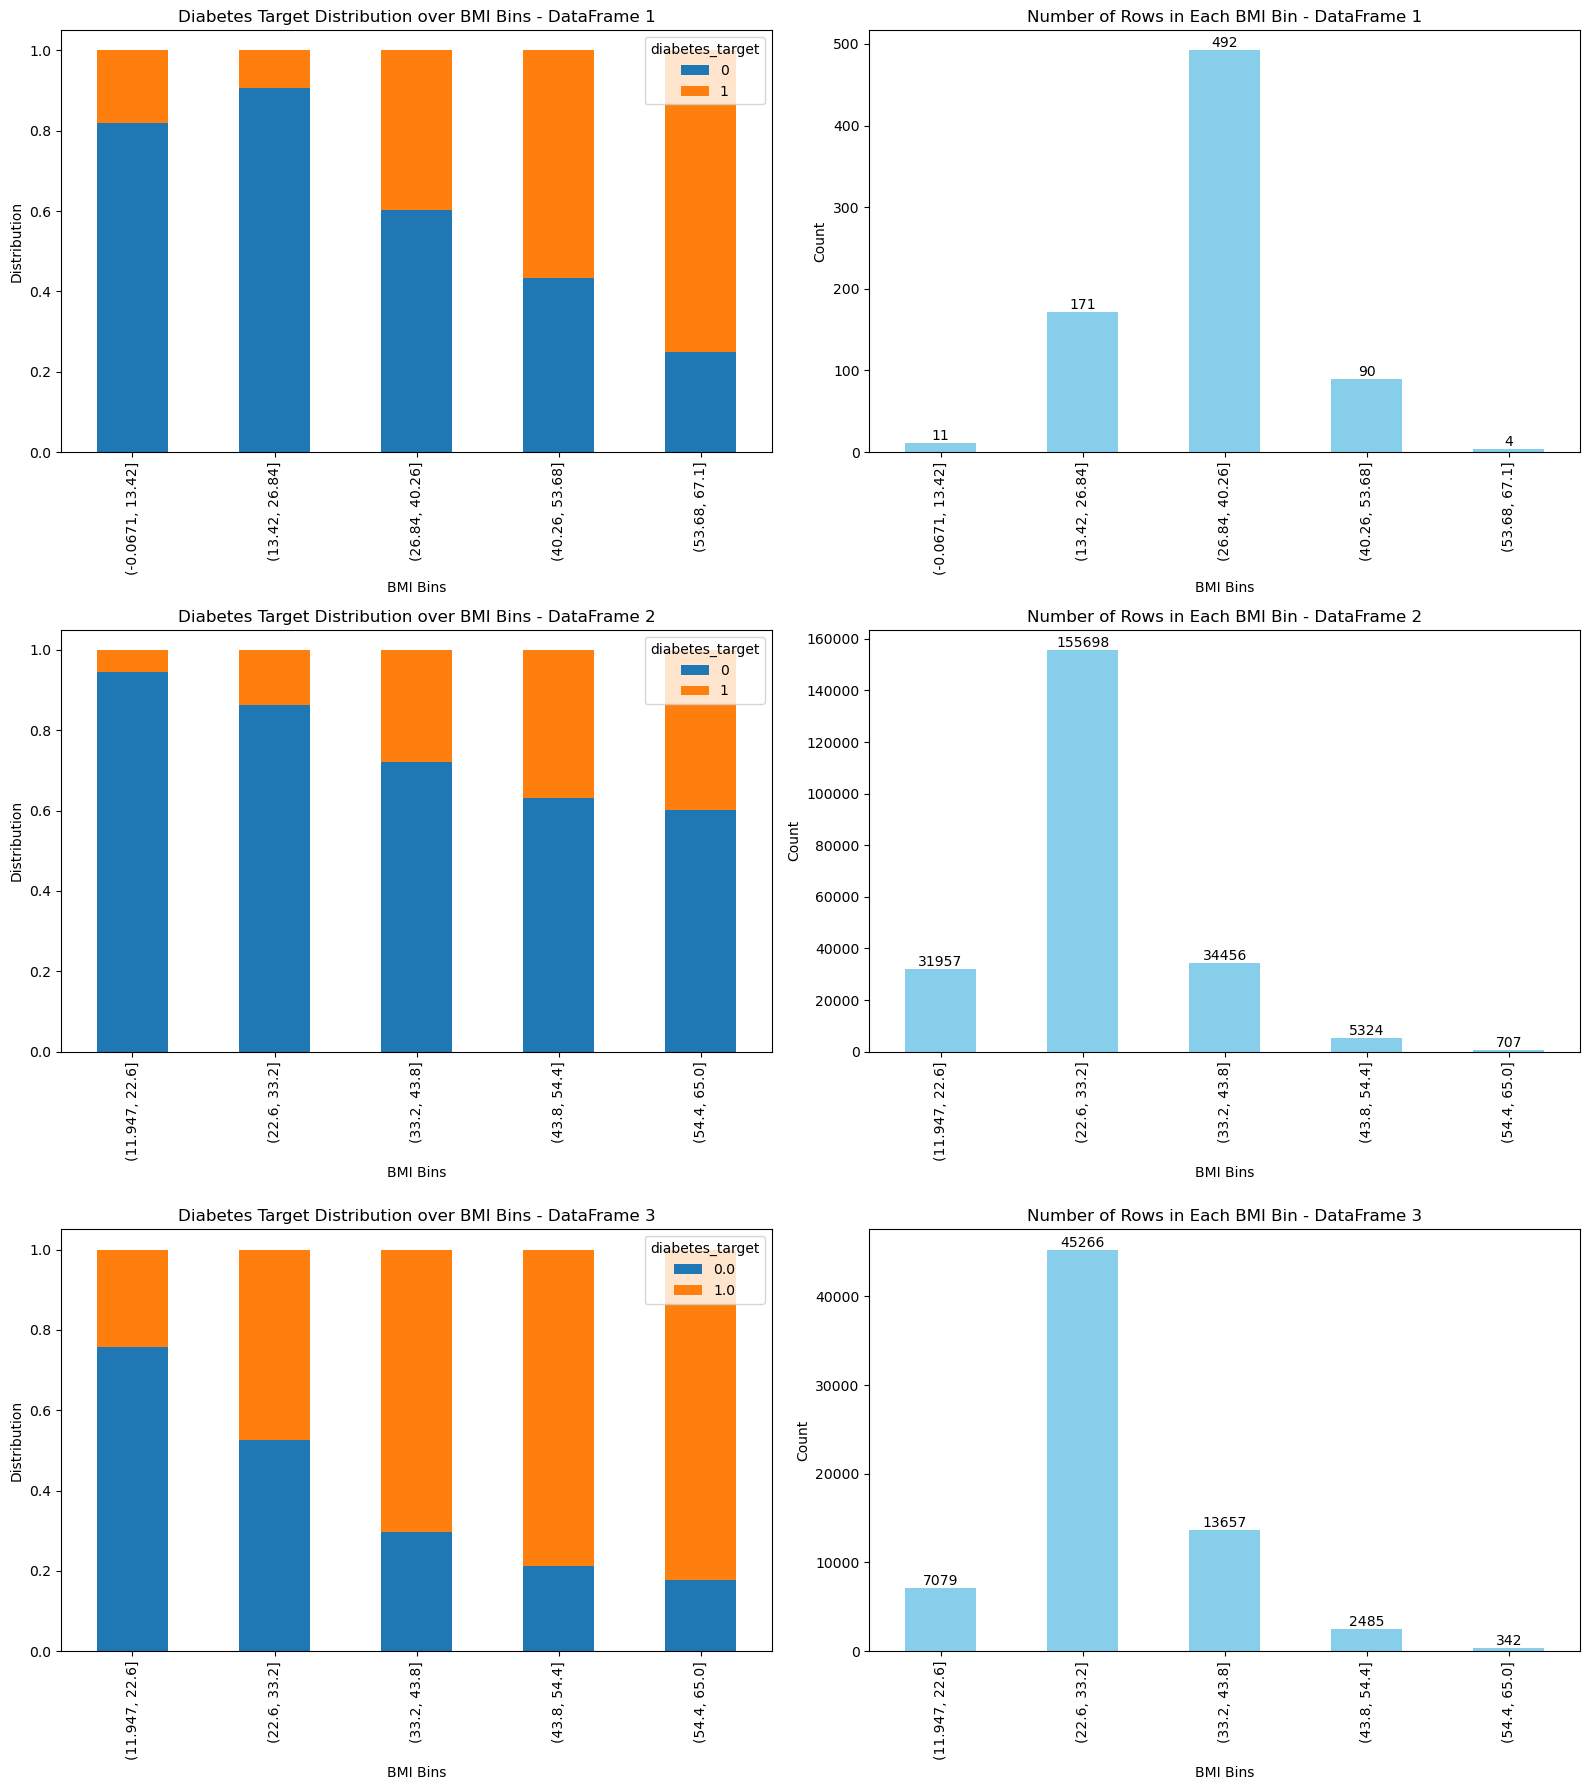

In [32]:
fig, axs = plt.subplots(len(dataframes), 2, figsize=(16, 6*len(dataframes)))

for i, df in enumerate(dataframes):
    # Creating 5 bins for BMI column
    bins = pd.cut(df['BMI'], bins=5)
    
    # first column plot shows the distribution of target w.r.t. bins
    bin_diabetes_distribution = df.groupby(bins)['diabetes_target'].value_counts(normalize=True).unstack()
    bin_diabetes_distribution.plot(kind='bar', stacked=True, ax=axs[i, 0])
    axs[i, 0].set_xlabel('BMI Bins')
    axs[i, 0].set_ylabel('Distribution')
    axs[i, 0].set_title(f'Diabetes Target Distribution over BMI Bins - DataFrame {i+1}')

    # second column shows the plots for the count of instances in each bin
    bin_counts = bins.value_counts().sort_index()
    bin_counts.plot(kind='bar', ax=axs[i, 1], color='skyblue')
    axs[i, 1].set_xlabel('BMI Bins')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_title(f'Number of Rows in Each BMI Bin - DataFrame {i+1}')
    
    # adding value on top of bar
    for j, count in enumerate(bin_counts):
        axs[i, 1].annotate(f'{count}', (j, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

From the above plots we can infer that BMI has high correlation with target column. So whenever the BMI increases the number of positives in the target are also increasing.

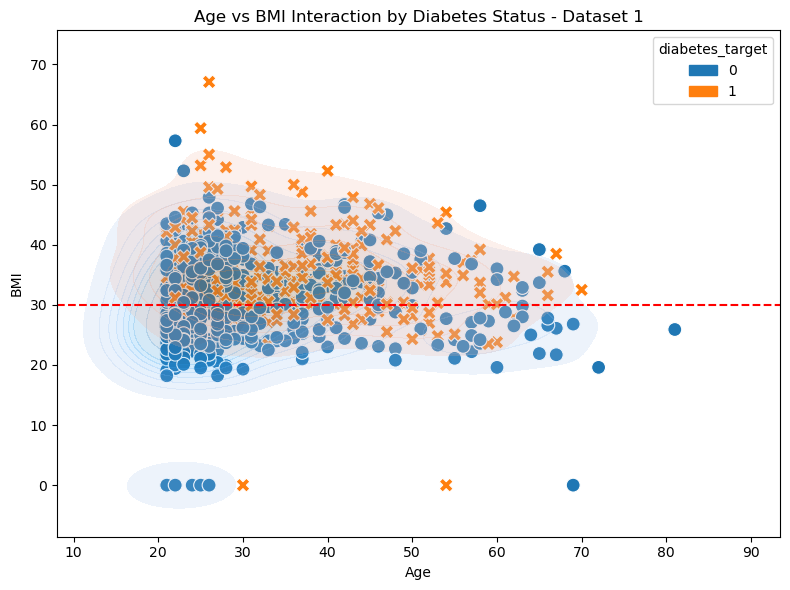

In [33]:
plt.figure(figsize=(8, 6))

# distribution of target w.r.t. Age and BMI
sns.scatterplot(data=df_1, x='Age', y='BMI', hue='diabetes_target', style='diabetes_target', s=100)
sns.kdeplot(data=df_1, x='Age', y='BMI', hue='diabetes_target', fill=True, alpha=0.2)
plt.title('Age vs BMI Interaction by Diabetes Status - Dataset 1')
plt.axhline(y=30, color='r', linestyle='--')

plt.tight_layout()
plt.show()

From the above scatter plot number of positives are more when BMI value is more than 30

In [34]:
# count of each type in target for all dataframes
for df in dataframes:
    print(df['diabetes_target'].value_counts())

diabetes_target
0    500
1    268
Name: count, dtype: int64
diabetes_target
0    193158
1     34984
Name: count, dtype: int64
diabetes_target
1.0    34984
0.0    33845
Name: count, dtype: int64


# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Before scaling
print("Dataframe before scaling:")
display(df_1.head())

# scaling all features only
target = df_1['diabetes_target']
df_1.drop(columns=['diabetes_target'], inplace = True)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_1)

df_1 = pd.DataFrame(scaled_features, columns=df_1.columns)
df_1['diabetes_target'] = target


# After scaling
print("\nAfter scaling:")
display(df_1.head())

Dataframe before scaling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Glucose,diabetes_target
0,6,148,72,35,0,33.6,0.627,50,181.6,1
1,1,85,66,29,0,26.6,0.351,31,111.6,0
2,8,183,64,0,0,23.3,0.672,32,206.3,1
3,1,89,66,23,94,28.1,0.167,21,117.1,0
4,0,137,40,35,168,43.1,2.288,33,180.1,1



After scaling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Glucose,diabetes_target
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0.830844,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-1.194694,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.545569,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-1.035545,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0.787439,1


<h1>Supervised Learning</h1>

In [36]:
# importing packages
from sklearn.model_selection import train_test_split

In [37]:
df = df_1.select_dtypes(include=['number'])  # selecting only number datatypes from the dataframe

X = df.drop('diabetes_target', axis=1)
y = df['diabetes_target']

# Splitting the data into training and testing sets
df_1_split = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
df = df_2.select_dtypes(include=['number'])

X = df.drop('diabetes_target', axis=1)
y = df['diabetes_target'] 

# Splitting the data into training and testing sets
df_2_split = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
df = df_3.select_dtypes(include=['number'])

X = df.drop('diabetes_target', axis=1)
y = df['diabetes_target']

# Splitting the data into training and testing sets
df_3_split = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>LOGISTIC REGRESSION</h2>

In [40]:
# importing packages for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# getting train and test sets
X_train, X_test, y_train, y_test = df_1_split

# building and training model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
lr_accuracy_1 = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", lr_accuracy_1)

Logistic Regression Accuracy: 0.7532467532467533


In [42]:
# getting train and test sets
X_train, X_test, y_train, y_test = df_2_split

# building and training model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


# Evaluating the model
lr_accuracy_2 = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", lr_accuracy_2)

Logistic Regression Accuracy: 0.8504898200705692


In [43]:
# getting train and test sets
X_train, X_test, y_train, y_test = df_3_split

# building and training model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


# Evaluating the model
lr_accuracy_3 = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", lr_accuracy_3)

Logistic Regression Accuracy: 0.7472758971378759


<h2>Random Forest Classifier</h2>

In [44]:
# importing packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
X_train, X_test, y_train, y_test = df_1_split

# building and training model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train) 

# predicting testset
y_pred_rf = rf.predict(X_test)

# evaluating metrics for the model
rfc_1 = {
    'Accuracy' : accuracy_score(y_test, y_pred_rf),
    'F1 Score' : f1_score(y_test, y_pred_rf),
    'Precision' : precision_score(y_test, y_pred_rf),
    'Recall' : recall_score(y_test, y_pred_rf),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in rfc_1.items()]))

report = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", report)


Accuracy: 0.75
F1 Score: 0.64
Precision: 0.67
Recall: 0.62

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [46]:
X_train, X_test, y_train, y_test = df_2_split

# building and training model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  

# predicting testset
y_pred_rf = rf.predict(X_test)

# evaluating metrics for the model
rfc_2 = {
    'Accuracy' : accuracy_score(y_test, y_pred_rf),
    'F1 Score' : f1_score(y_test, y_pred_rf),
    'Precision' : precision_score(y_test, y_pred_rf),
    'Recall' : recall_score(y_test, y_pred_rf),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in rfc_2.items()]))


report = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", report)


Accuracy: 0.84
F1 Score: 0.26
Precision: 0.46
Recall: 0.18

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     38564
           1       0.46      0.18      0.26      7065

    accuracy                           0.84     45629
   macro avg       0.66      0.57      0.58     45629
weighted avg       0.80      0.84      0.81     45629



In [47]:
X_train, X_test, y_train, y_test = df_3_split

# building and training model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 

# predicting testset
y_pred_rf = rf.predict(X_test)

# evaluating metrics for the model
rfc_3 = {
    'Accuracy' : accuracy_score(y_test, y_pred_rf),
    'F1 Score' : f1_score(y_test, y_pred_rf),
    'Precision' : precision_score(y_test, y_pred_rf),
    'Recall' : recall_score(y_test, y_pred_rf),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in rfc_3.items()]))


report = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", report)


Accuracy: 0.73
F1 Score: 0.74
Precision: 0.72
Recall: 0.77

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      6694
         1.0       0.72      0.77      0.74      7072

    accuracy                           0.73     13766
   macro avg       0.73      0.73      0.73     13766
weighted avg       0.73      0.73      0.73     13766



<h2>Hyperparameter Tuning for Random Forest</h2>

Using Grid Search CV to hypertune the model

In [48]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = df_1_split

# building and training model
param_grid = {
    'n_estimators': [5, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initializing the Grid Search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# predicting testset
y_pred_gs = grid_search.predict(X_test)

# evaluating metrics for the model
gs_rf_1 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gs),
    'F1 Score' : f1_score(y_test, y_pred_gs),
    'Precision' : precision_score(y_test, y_pred_gs),
    'Recall' : recall_score(y_test, y_pred_gs),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gs_rf_1.items()]))


report = classification_report(y_test, y_pred_gs)
print("\nClassification Report:\n", report)


Accuracy: 0.74
F1 Score: 0.65
Precision: 0.63
Recall: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [49]:
X_train, X_test, y_train, y_test = df_2_split

# building and training model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initializing the Grid Search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# predicting testset
y_pred_gs = grid_search.predict(X_test)

# evaluating metrics for the model
gs_rf_2 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gs),
    'F1 Score' : f1_score(y_test, y_pred_gs),
    'Precision' : precision_score(y_test, y_pred_gs),
    'Recall' : recall_score(y_test, y_pred_gs),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gs_rf_2.items()]))


report = classification_report(y_test, y_pred_gs)
print("Classification Report:\n", report)


Accuracy: 0.85
F1 Score: 0.19
Precision: 0.60
Recall: 0.11
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     38564
           1       0.60      0.11      0.19      7065

    accuracy                           0.85     45629
   macro avg       0.73      0.55      0.55     45629
weighted avg       0.82      0.85      0.80     45629



In [50]:
X_train, X_test, y_train, y_test = df_3_split

# building and training model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# predicting testset
y_pred_gs = grid_search.predict(X_test)

# evaluating metrics for the model
gs_rf_3 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gs),
    'F1 Score' : f1_score(y_test, y_pred_gs),
    'Precision' : precision_score(y_test, y_pred_gs),
    'Recall' : recall_score(y_test, y_pred_gs),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gs_rf_3.items()]))


report = classification_report(y_test, y_pred_gs)
print("Classification Report:\n", report)

Accuracy: 0.75
F1 Score: 0.76
Precision: 0.73
Recall: 0.80
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      6694
         1.0       0.73      0.80      0.76      7072

    accuracy                           0.75     13766
   macro avg       0.75      0.74      0.74     13766
weighted avg       0.75      0.75      0.75     13766



<h2>Gradient Boosting Machine (GBM)</h2>


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = df_1_split

# building and training model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# predicting testset
y_pred_gbm = gbm.predict(X_test)

# evaluating metrics for the model
gbm_1 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gbm),
    'F1 Score' : f1_score(y_test, y_pred_gbm),
    'Precision' : precision_score(y_test, y_pred_gbm),
    'Recall' : recall_score(y_test, y_pred_gbm),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gbm_1.items()]))
                 
report = classification_report(y_test, y_pred_gbm)
print("\nClassification Report:\n", report)


Accuracy: 0.72
F1 Score: 0.62
Precision: 0.60
Recall: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [52]:
X_train, X_test, y_train, y_test = df_2_split

# building and training model
gbm = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=4, random_state=42)
gbm.fit(X_train, y_train)

# predicting testset
y_pred_gbm = gbm.predict(X_test)

# evaluating metrics for the model
gbm_2 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gbm),
    'F1 Score' : f1_score(y_test, y_pred_gbm),
    'Precision' : precision_score(y_test, y_pred_gbm),
    'Recall' : recall_score(y_test, y_pred_gbm),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gbm_2.items()]))
                 

report = classification_report(y_test, y_pred_gbm)
print("Classification Report:\n", report)

Accuracy: 0.85
F1 Score: 0.23
Precision: 0.59
Recall: 0.14
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     38564
           1       0.59      0.14      0.23      7065

    accuracy                           0.85     45629
   macro avg       0.73      0.56      0.57     45629
weighted avg       0.82      0.85      0.81     45629



In [53]:
X_train, X_test, y_train, y_test = df_3_split

# building and training model
gbm = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=4, random_state=42)
gbm.fit(X_train, y_train)

# predicting testset
y_pred_gbm = gbm.predict(X_test)

# evaluating metrics for the model
gbm_3 = {
    'Accuracy' : accuracy_score(y_test, y_pred_gbm),
    'F1 Score' : f1_score(y_test, y_pred_gbm),
    'Precision' : precision_score(y_test, y_pred_gbm),
    'Recall' : recall_score(y_test, y_pred_gbm),  
}

print('\n'.join([f"{key}: {value:.2f}" for key, value in gbm_3.items()]))
                 

report = classification_report(y_test, y_pred_gbm)
print("Classification Report:\n", report)

Accuracy: 0.75
F1 Score: 0.77
Precision: 0.74
Recall: 0.80
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6694
         1.0       0.74      0.80      0.77      7072

    accuracy                           0.75     13766
   macro avg       0.75      0.75      0.75     13766
weighted avg       0.75      0.75      0.75     13766



# Model Comparison and Performance Evaluation

In [54]:
print('Linear Regression Performance for datasets')
print('Accuracy -', lr_accuracy_1)
print()
print('Accuracy -', lr_accuracy_2)
print()
print('Accuracy -', lr_accuracy_3)

print('-'*50)
print('Random Forest Classifier Performance for datasets')
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in rfc_1.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in rfc_2.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in rfc_3.items()]))


print('-'*50)
print('Random Forest Classifier Hypertuned with Grid Search CV Performance for datasets')
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gs_rf_1.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gs_rf_2.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gs_rf_3.items()]))


print('-'*50)
print('Gradient Boosting Machine Performance for datasets')
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gbm_1.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gbm_2.items()]))
print()
print('\n'.join([f"{key:10}: {value:.2f}" for key, value in gbm_3.items()]))

Linear Regression Performance for datasets
Accuracy - 0.7532467532467533

Accuracy - 0.8504898200705692

Accuracy - 0.7472758971378759
--------------------------------------------------
Random Forest Classifier Performance for datasets
Accuracy  : 0.75
F1 Score  : 0.64
Precision : 0.67
Recall    : 0.62

Accuracy  : 0.84
F1 Score  : 0.26
Precision : 0.46
Recall    : 0.18

Accuracy  : 0.73
F1 Score  : 0.74
Precision : 0.72
Recall    : 0.77
--------------------------------------------------
Random Forest Classifier Hypertuned with Grid Search CV Performance for datasets
Accuracy  : 0.74
F1 Score  : 0.65
Precision : 0.63
Recall    : 0.67

Accuracy  : 0.85
F1 Score  : 0.19
Precision : 0.60
Recall    : 0.11

Accuracy  : 0.75
F1 Score  : 0.76
Precision : 0.73
Recall    : 0.80
--------------------------------------------------
Gradient Boosting Machine Performance for datasets
Accuracy  : 0.72
F1 Score  : 0.62
Precision : 0.60
Recall    : 0.64

Accuracy  : 0.85
F1 Score  : 0.23
Precision : 0.5

From the above metrics we can see
    For first dataset Linear regression is perfoeming well.
    For second dataset the accuracy is more but other metrics are low.
    For third dataset accuracy is acceptable, but metrics are also good.
    
Coming to model selection both hypertuned Decision tree and Gradient boosting is perfoming well.
But Gradient boosting takes less time to train.

# UNSUPERVISED LEARNING

<h2>DBSCAN Clustering</h2>

In [55]:
dataframes = [df_1, df_2, df_3]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score



for df, epsilon in zip(dataframes, [0.7, 0.25, 0.2]):
    # Scale the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)

    # Creating DataFrame from scaled data
    data_preprocessed = pd.DataFrame(data_scaled, columns=df.columns)



    # Initialize DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=2)
    dbscan.fit(data_preprocessed)

    data_preprocessed['dbscan_cluster'] = dbscan.labels_

    dbscan_labels_filtered = dbscan.labels_[dbscan.labels_ != -1]
    data_dbscan_filtered = data_preprocessed[dbscan.labels_ != -1]

    # calculating evaluation metrics
    if len(set(dbscan_labels_filtered)) > 1:  # Silhouette score requires more than one cluster
        dbscan_silhouette = silhouette_score(data_dbscan_filtered.drop(['dbscan_cluster'], axis=1), dbscan_labels_filtered)
    else:
        dbscan_silhouette = None  # Not applicable if all points are noise or in one cluster
        
    dbscan_homogeneity = homogeneity_score(df['diabetes_target'], dbscan.labels_)
    dbscan_completeness = completeness_score(df['diabetes_target'], dbscan.labels_)

    print("\nDBSCAN Performance Metrics:")
    print("Silhouette Score:", dbscan_silhouette)
    print("Homogeneity:", dbscan_homogeneity)
    print("Completeness:", dbscan_completeness)
    print('-'*50)


DBSCAN Performance Metrics:
Silhouette Score: 0.4571123300895485
Homogeneity: 0.08938857421062835
Completeness: 0.07650639663543418
--------------------------------------------------

DBSCAN Performance Metrics:
Silhouette Score: 0.3578566195572245
Homogeneity: 0.08787154915118342
Completeness: 0.01973407908324958
--------------------------------------------------

DBSCAN Performance Metrics:
Silhouette Score: 0.5905571434016548
Homogeneity: 0.06379617708192432
Completeness: 0.06506755257095166
--------------------------------------------------


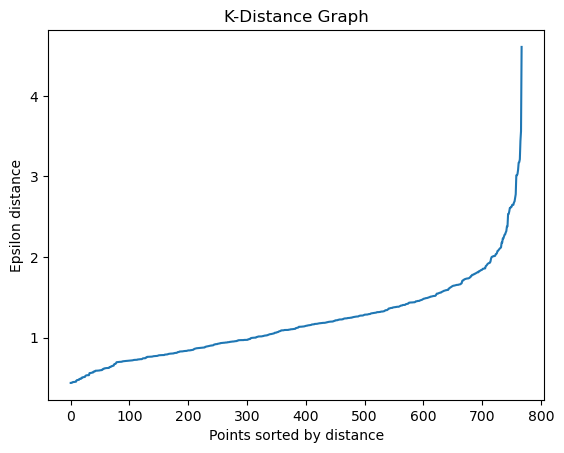

In [57]:
# k distance graph used to select episilon value
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_1)
data_preprocessed = pd.DataFrame(data_scaled, columns=df_1.columns)



neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_preprocessed)
distances, indices = nbrs.kneighbors(data_preprocessed)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()


<h2>K means clustering </h2>

In [58]:
# importing packages needed
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


for df in dataframes:
#     scaling datasets
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    data_preprocessed = pd.DataFrame(data_scaled, columns=df.columns)


#     building model
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(data_preprocessed)

    
    data_preprocessed['kmeans_cluster'] = kmeans.labels_

#     calculating perfomance metrics
    kmeans_inertia = kmeans.inertia_
    kmeans_silhouette = silhouette_score(data_preprocessed.drop(['kmeans_cluster'], axis=1), kmeans.labels_)
    kmeans_homogeneity = homogeneity_score(df['diabetes_target'], kmeans.labels_)
    kmeans_completeness = completeness_score(df['diabetes_target'], kmeans.labels_)

    print("K-Means Performance Metrics:")
    print("Inertia:", kmeans_inertia)
    print("Silhouette Score:", kmeans_silhouette)
    print("Homogeneity:", kmeans_homogeneity)
    print("Completeness:", kmeans_completeness)


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K-Means Performance Metrics:
Inertia: 6100.399448552465
Silhouette Score: 0.2246867448249713
Homogeneity: 0.3425082390896322
Completeness: 0.3366028548930505


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Performance Metrics:
Inertia: 4846100.570327259
Silhouette Score: 0.16659872698638842
Homogeneity: 0.170139905651611
Completeness: 0.10978469532437699


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Performance Metrics:
Inertia: 1437950.503592567
Silhouette Score: 0.15531819363335175
Homogeneity: 0.2135567234966636
Completeness: 0.21389764518585558


From the Unsupervised learning model we can see for DBSCAN Silhouette score is more but homoginity and completness is low. 
It is viceversa in K means clustering.

# Feature importance

In [59]:
# below is feature importance for third dataset
if hasattr(rf, "feature_importances_"):
    feature_importances_rf = rf.feature_importances_
    print("Random Forest Feature Importances:")
    for i, importance in enumerate(feature_importances_rf):
        print(f"Feature {i + 1}: {importance:.4f}")
    print("------------------------------------------------------------")

if hasattr(gbm, "feature_importances_"):
    feature_importances_gb = gbm.feature_importances_
    print("Gradient Boosting Feature Importances:")
    for i, importance in enumerate(feature_importances_gb):
        print(f"Feature {i + 1}: {importance:.4f}")
    print("------------------------------------------------------------")
# Assuming you have already trained Logistic Regression model
if hasattr(log_reg, "coef_"):
    coefficients = log_reg.coef_[0]
    print("Logistic Regression Coefficients:")
    for i, coef in enumerate(coefficients):
        print(f"Feature {i + 1}: {coef:.4f}")
    print("------------------------------------------------------------")


Random Forest Feature Importances:
Feature 1: 0.0322
Feature 2: 0.0177
Feature 3: 0.0054
Feature 4: 0.1138
Feature 5: 0.0267
Feature 6: 0.0093
Feature 7: 0.0166
Feature 8: 0.0224
Feature 9: 0.0265
Feature 10: 0.0201
Feature 11: 0.0090
Feature 12: 0.0072
Feature 13: 0.0459
Feature 14: 0.0462
Feature 15: 0.0601
Feature 16: 0.0122
Feature 17: 0.0248
Feature 18: 0.0733
Feature 19: 0.0545
Feature 20: 0.0784
Feature 21: 0.0716
Feature 22: 0.0295
Feature 23: 0.0445
Feature 24: 0.1522
------------------------------------------------------------
Gradient Boosting Feature Importances:
Feature 1: 0.0016
Feature 2: 0.0287
Feature 3: 0.0111
Feature 4: 0.0542
Feature 5: 0.0004
Feature 6: 0.0014
Feature 7: 0.0121
Feature 8: 0.0002
Feature 9: 0.0001
Feature 10: 0.0002
Feature 11: 0.0119
Feature 12: 0.0004
Feature 13: 0.0027
Feature 14: 0.0017
Feature 15: 0.0005
Feature 16: 0.0010
Feature 17: 0.0073
Feature 18: 0.0015
Feature 19: 0.0024
Feature 20: 0.0089
Feature 21: 0.5617
Feature 22: 0.0377
Feature 2